#### [ 이미지 변환 - 크기 변경 ]
- 이미지 전처리 시에 필수
- 수집된 이미지도 모두 크기가 달라서 동일 크기로 맞추는 작읍

In [48]:
import seaborn as sns
import pandas as pd # 데이터 분석 및 전처리
import numpy as np # 숫자처리
import matplotlib.pyplot as plt # 데이터 시각화
import cv2
import os

In [49]:
# imgDir = '../_data/_image/'
# videoDir = '../_data/_video/'
# fileName = 'image_fx_ (1).jpg'

In [50]:
# colorImg = cv2.imread(imgDir+fileName, cv2.IMREAD_COLOR)
# if colorImg is not False:
#     print(fileName)
#     print(f"shape: {colorImg.shape}     ndim: {colorImg.ndim}")
# else:
#     print(f'{colorImg} check')

In [51]:
# 3-1 이미지 축소
#      이미지데이터 , 축소w, h


In [52]:
# cv2.imwrite(imgDir+'down_'+fileName, colorImg)



In [53]:
# upImg = cv2.resize(colorImg, (768*2, 1408*2), interpolation=cv2.INTER_AREA)

# cv2.imwrite(imgDir+'up_'+fileName, upImg)    

# upImg = cv2.imread(imgDir+'up_image_fx_ (1).jpg',cv2.IMREAD_COLOR)
# if upImg is not False:
#     print('up_image_fx_ (1).jpg')
#     print(f"shape: {upImg.shape}     ndim: {upImg.ndim}")
# else:
#     print(f'{upImg} check')
    


In [54]:
# downImg = cv2.resize(colorImg, (768//2, 1408//2), interpolation=cv2.INTER_AREA)
# cv2.imwrite(imgDir+'down_'+fileName, downImg)    
# downImg = cv2.imread(imgDir+'down_image_fx_ (1).jpg',cv2.IMREAD_COLOR)
# if downImg is not False:
#     print('down_image_fx_ (1).jpg')
#     print(f"shape: {downImg.shape}     ndim: {downImg.ndim}")
# else:
#     print(f'{downImg} check')
    


In [55]:
# cv2.imshow('[SMALL]', downImg)
# cv2.imshow('[ORIGIN]', colorImg)
# cv2.imshow('[LARGE]', upImg)

# cv2.waitKey()
# cv2.destroyAllWindows()

[4]

In [63]:
imgDir2 = '../_data/_image/rose/'
fileName = 'wall_rose (8).jpg'

In [64]:
colorImg = cv2.imread(imgDir2+fileName, cv2.IMREAD_COLOR)
if colorImg is not False:
    print(fileName)
    print(f"shape: {colorImg.shape}     ndim: {colorImg.ndim}")
else:
    print(f'{colorImg} check')

wall_rose (8).jpg
shape: (226, 203, 3)     ndim: 3


In [84]:
upImg = cv2.resize(colorImg, (203*2,226*2), interpolation=cv2.INTER_AREA)

cv2.imwrite(imgDir2+'up_'+fileName, upImg)    

upImg = cv2.imread(imgDir2+'up_'+fileName, cv2.IMREAD_COLOR)
if upImg is not False:
    print(fileName)
    print(f"shape: {upImg.shape}     ndim: {upImg.ndim}")
else:
    print(f'{upImg} check')
    


wall_rose (8).jpg
shape: (452, 406, 3)     ndim: 3


In [85]:
downImg = cv2.resize(colorImg, (203//2,226//2), interpolation=cv2.INTER_AREA)
cv2.imwrite(imgDir2+'down_'+fileName, downImg)    
downImg = cv2.imread(imgDir2+'down_'+fileName,cv2.IMREAD_COLOR)
if downImg is not False:
    print(fileName)
    print(f"shape: {downImg.shape}     ndim: {downImg.ndim}")
else:
    print(f'{downImg} check')
    


wall_rose (8).jpg
shape: (113, 101, 3)     ndim: 3


In [86]:
cv2.imshow('[SMALL]', downImg)
cv2.imshow('[ORIGIN]', colorImg)
cv2.imshow('[LARGE]', upImg)

cv2.waitKey()
cv2.destroyAllWindows()

In [87]:
def drawImage(row, col, imgList):
    fig, axes = plt.subplots(row, col, sharex=True, sharey=True)
    axes = axes.flatten() if col >= 2 else [axes]
    
    for ax, img in zip(axes, imgList):
        ax.imshow(img)
        ax.set_title(f"{img.shape}")
        
    plt.tight_layout()
    plt.show()

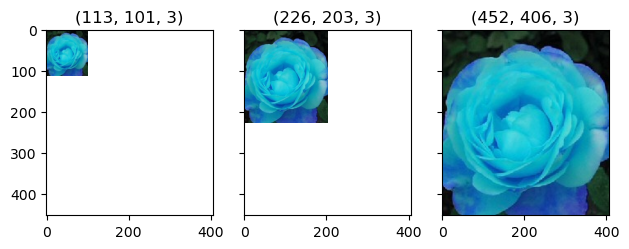

In [88]:
drawImage(1,3, [downImg, colorImg, upImg])

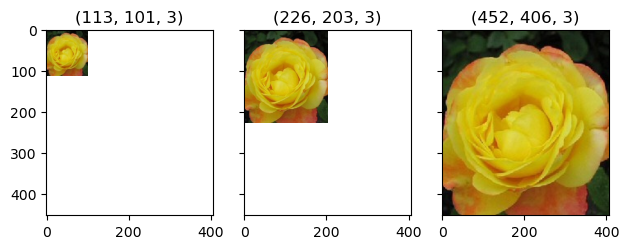

In [89]:
### opencv 채널 순서 BGR ===> 일반 채널 순서 RGB 변환
# cv2.cvtColor(이미지데이터, 변형형식)

downImg2 = cv2.cvtColor(downImg, cv2.COLOR_BGR2RGB)
colorImg2 = cv2.cvtColor(colorImg, cv2.COLOR_BGR2RGB)
upImg2 = cv2.cvtColor(upImg, cv2.COLOR_BGR2RGB)

#시각화
drawImage(1,3, [downImg2, colorImg2, upImg2])

[5] 상대적 크기 이미지 축소/확대

In [93]:
fileName = 'wall_rose (9).jpg'

colorImg = cv2.imread(imgDir2+fileName, cv2.IMREAD_COLOR)
if colorImg is not False:
    print(fileName)
    print(f"shape: {colorImg.shape}     ndim: {colorImg.ndim}")
else:
    print(f'{colorImg} check')
H, W, _ = colorImg.shape    

wall_rose (9).jpg
shape: (226, 203, 3)     ndim: 3


In [100]:
## [5-1] 이미지 축소 => 보간법 : cv2.inter_area
## 이미지데이터, (0,0), fx=int(w*0.5), fxy = int(H*0.5)
##                      1보다 작게하면 축소
# downImg = cv2.resize(colorImg, None, None, 2 , 2, interpolation=cv2.INTER_AREA)
downImg = cv2.resize(colorImg, dsize=(0,0), fx=0.5 , fy=0.5, interpolation=cv2.INTER_AREA)
cv2.imwrite(imgDir2+'down_'+fileName, downImg)    


True

In [101]:
downImg = cv2.imread(imgDir2+'down_'+fileName,cv2.IMREAD_COLOR)
if downImg is not False:
    print(fileName)
    print(f"shape: {downImg.shape}     ndim: {downImg.ndim}")
else:
    print(f'{downImg} check')

wall_rose (9).jpg
shape: (113, 102, 3)     ndim: 3


In [103]:
## [5-1] 이미지 확대 => 보간법 : cv2.cubic or linear
## 이미지데이터, (0,0), fx=int(w*0.5), fxy = int(H*0.5)
##                      1보다 작게하면 축소
# downImg = cv2.resize(colorImg, None, None, 2 , 2, interpolation=cv2.INTER_AREA)
upImg = cv2.resize(colorImg, dsize=(0,0), fx=1.2 , fy=1.2, interpolation=cv2.INTER_CUBIC)
cv2.imwrite(imgDir2+'up_'+fileName, upImg)    


True

In [104]:
upImg = cv2.imread(imgDir2+'up_'+fileName,cv2.IMREAD_COLOR)
if upImg is not False:
    print(fileName)
    print(f"shape: {upImg.shape}     ndim: {upImg.ndim}")
else:
    print(f'{upImg} check')

wall_rose (9).jpg
shape: (271, 244, 3)     ndim: 3


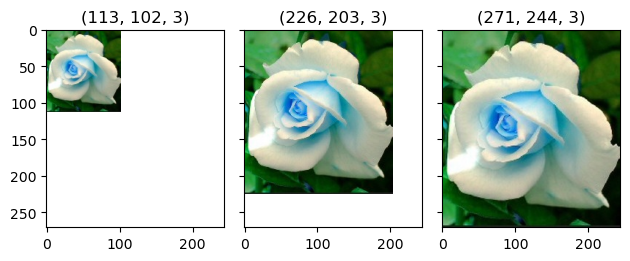

In [106]:
drawImage(1,3, [downImg, colorImg, upImg])

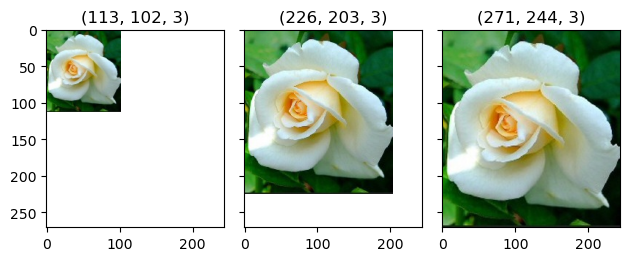

In [107]:
### opencv 채널 순서 BGR ===> 일반 채널 순서 RGB 변환
# cv2.cvtColor(이미지데이터, 변형형식)

downImg2 = cv2.cvtColor(downImg, cv2.COLOR_BGR2RGB)
colorImg2 = cv2.cvtColor(colorImg, cv2.COLOR_BGR2RGB)
upImg2 = cv2.cvtColor(upImg, cv2.COLOR_BGR2RGB)

#시각화
drawImage(1,3, [downImg2, colorImg2, upImg2])